1. Import Packages and Data File

In [12]:
# Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# Import Data File
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('cookie_cats.csv')

Saving cookie_cats.csv to cookie_cats.csv


In [4]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


2. Data Exploration

In [5]:
# Count number of unique user
df.userid.nunique()

90189

In [6]:
# Check Missing Value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [7]:
# Count number of players for each version
df.groupby('version')['userid'].count()

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

In [8]:
# Count Gamerounds for each version
df.groupby('version')['sum_gamerounds'].agg(["count","mean","median","std","max"])

,count,mean,median,std,max
version,,,,,
gate_30,44700,52.456264,17.0,256.716423,49854
gate_40,45489,51.298776,16.0,103.294416,2640


<Axes: >

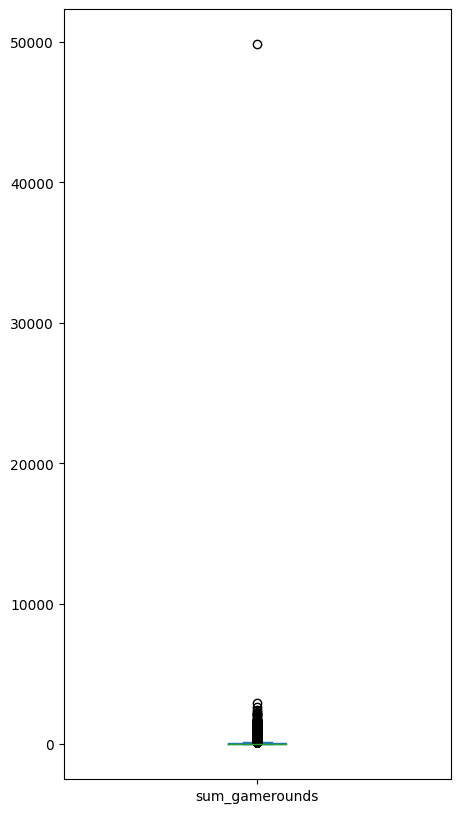

In [9]:
# Check Outliner
df['sum_gamerounds'].plot.box(figsize=(5,10))

In [14]:
# Check distribution of sum_gamerounds column
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [10]:
# Count the number of players for each number of gamerounds
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

Text(0.5, 0, '# Game rounds')

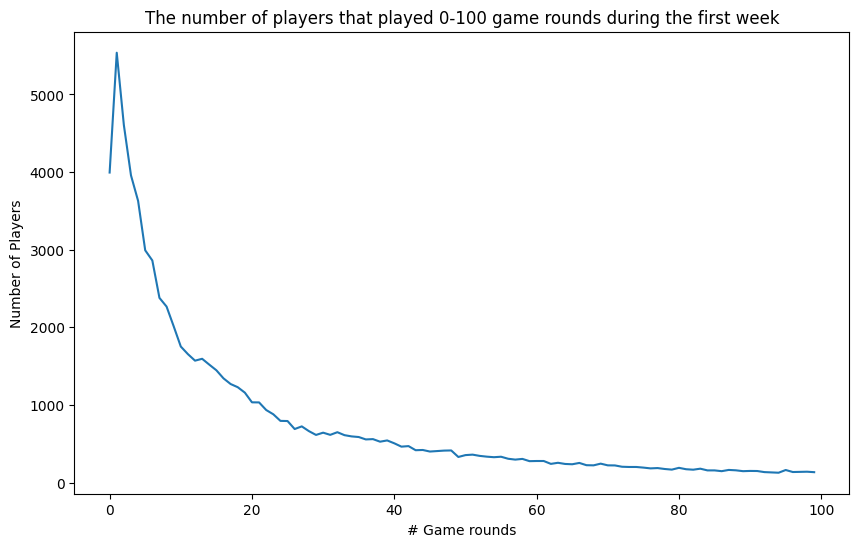

In [16]:
# Plot the distribution of players that played 0 to 100 game rounds
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

Summary
1. The dataset is composed by data from 90,189 players.
2. No missing value is found in this dataset.
3. The number of players is roughly the same in control group (gate_30) and test group (gate_40).
4. Outliners is being observed from the dataset, where 1 player has an exceptionally high gamerounds of 49,854 while 75% of players layed fewer than 51 rounds.
5. More than half of the players played less than 16 rounds.
5. 3,994 players did not play a single round during the first week.
6. Distribution of the number of players vs gamerounds is highly skewed, with a long tail on the right.

3.1 1-Day Retention

In [17]:
# Calculate Overall 1-day retention
df['retention_1'].sum() / df['retention_1'].count()

0.4452095044850259

In [18]:
# Calculate Retention by each version
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

<Axes: ylabel='Density'>

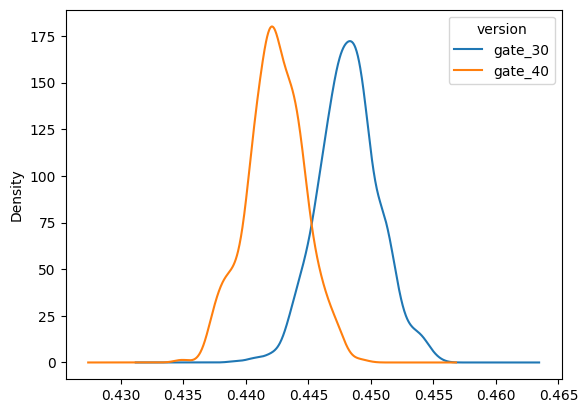

In [20]:
# Create a list with bootstrapped means for each version
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

# Transform the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)

# Plot the bootstrap distributions
boot_1d.plot(kind='density')

Text(0.5, 1.0, '% difference in 1-day retention between the versions')

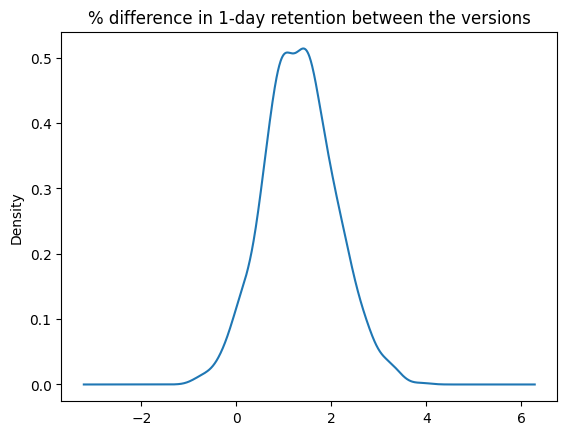

In [35]:
# Add a column with the % difference between the two versions
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

# Plot the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the versions')

In [45]:
# Calculate the probability that 1-day retention is greater when the gate is at level 30
(boot_1d['diff'] > 0).mean()

0.966

Summmary
1. 44.5% of players returned and plays the game ONE DAY after they have installed it.
2. Slight decrease of players observed when the gate is at 40.
3. The % difference is around 1%-2%.
4. The probability that 1-day retention is greater when the gate is at level 30 (Control Group) is 96.6%.

3.2.7-Day Retention

In [30]:
# Calculate Overall 7-day retention
df['retention_7'].sum() / df['retention_7'].count()

0.1860648194347426

In [23]:
# Calculate Retention by each version
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Text(0.5, 1.0, '% difference in 7-day retention between the versions')

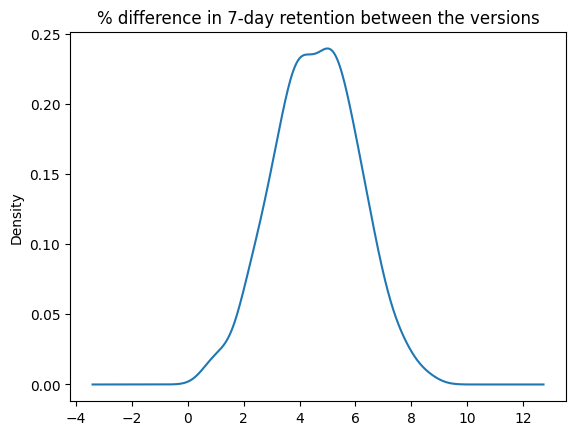

In [46]:
# Create a list with bootstrapped means for each versions
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

# Transform the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Add a column with the % difference between the two versions
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

# Plot the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the versions')

In [47]:
# Calculate the probability that 7-day retention is greater when the gate is at level 30
(boot_7d['diff'] > 0).mean()

1.0

Summmary
1. 18.6% of players returned and plays the game SEVEN DAY after they have installed it.
2. Slight decrease of players observed when the gate is at 40.
3. The % difference is LARGER than that of 1-day retention.
4. The probability that 7-day retention is greater when the gate is at level 30 (Control Group) is 100%..

3.3. Compare 1-Day Retention and 7-day Retention in one plot


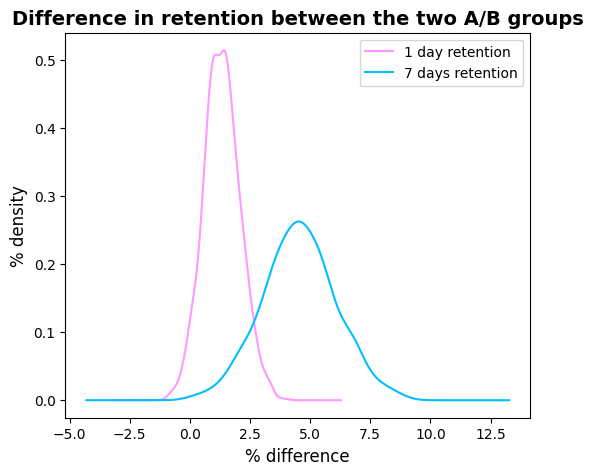

In [29]:
# Plot the bootstrap % difference
fig, ax = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax, c="#ff99ff", label = "1 day retention")
boot_7d['diff'].plot.kde(ax=ax, c= "#00bfff", label = "7 days retention")

ax.set_xlabel("% difference",size=12)
ax.set_ylabel("% density",size=12)
ax.set_title("Difference in retention between the two A/B groups", fontweight="bold", size=14)
plt.legend()
plt.show()

Conculsion

From both 1-day and 7-day Retention results, the gate should be set at level 30 instead of level 40.